In [116]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
original_dir = r'C:\Users\pedro\Desktop\Breast-Cancer-Detection\Data\breast'

In [7]:
classes = ['benign', 'malignant']
sub_classes = ['train', 'validation', 'test']

In [8]:
base_dir = r'C:\Users\pedro\Desktop\Breast-Cancer-Detection\binary_class'
os.mkdir(base_dir)

In [12]:
unnested = r'C:\Users\pedro\Desktop\Breast-Cancer-Detection\unnested'
os.mkdir(unnested)

Create Folders

In [10]:
for i in sub_classes:
    for j in classes:
        os.makedirs(os.path.join(base_dir, i, j))

Unnest the files

In [13]:
for i in classes:    
    for root, _, files in os.walk(os.path.join(original_dir, i)):
        for f in files:
            if f.lower().endswith(".png"):
                src = os.path.join(root, f)
                dst = os.path.join(unnested, f)
                shutil.copyfile(src, dst)

In [18]:
len(os.listdir(unnested))

7909

In [20]:
df = pd.read_csv(r'C:\Users\pedro\Desktop\Breast-Cancer-Detection\Data\breast\image_data.csv')

In [27]:
df

,path_to_image,Benign or Malignant,Cancer Type,Magnification
0,BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-011.png,Benign,Adenosis,100X
1,BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-005.png,Benign,Adenosis,100X
2,BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-004.png,Benign,Adenosis,100X
3,BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-010.png,Benign,Adenosis,100X
4,BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-006.png,Benign,Adenosis,100X
...,...,...,...,...
7904,BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-12204/200X/SOB_M_LC-14-12204-200-028.png,Malignant,Lobular Carcinoma,200X
7905,BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-12204/200X/SOB_M_LC-14-12204-200-029.png,Malignant,Lobular Carcinoma,200X
7906,BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-12204/200X/SOB_M_LC-14-12204-200-006.png,Malignant,Lobular Carcinoma,200X
7907,BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-12204/200X/SOB_M_LC-14-12204-200-039.png,Malignant,Lobular Carcinoma,200X


In [42]:
df['Benign or Malignant'].value_counts()

Benign or Malignant
Malignant    5426
Benign       2480
Name: count, dtype: int64

In [52]:
len(df)-df['Benign or Malignant'].count()

np.int64(3)

Theres 3 datapoints that dont have any information apart from the name.

In [86]:
df.isna().sum()

path_to_image          0
Benign or Malignant    3
Cancer Type            4
Magnification          4
dtype: int64

In [91]:
df.loc[df['Cancer Type'].isna()]

,path_to_image,Benign or Malignant,Cancer Type,Magnification
2871,BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-18842/100X/SOB_M_MC-14-18842-100-014.png,NaN,NaN,NaN
3093,BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-13413/200X/SOB_M_MC-14-13413-200-010.png,Malignant,NaN,NaN
3228,BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-10147/400X/SOB_M_MC-14-10147-400-013.png,NaN,NaN,NaN
4536,BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-14926/40X/SOB_M_DC-14-14926-40-012.png,NaN,NaN,NaN


In [106]:
df.loc[[2871,3093,3228,4536],'Benign or Malignant'] = 'Malignant'

In [107]:
df['Cancer Type'].value_counts()

Cancer Type
Ductal Carcinoma       3450
Fibroadenoma           1014
Mucinous Carcinoma      789
Lobular Carcinoma       626
Tubular Adenoma         569
Papillary Carcinoma     560
Phyllodes Tumor         453
Adenosis                444
Name: count, dtype: int64

In [108]:
df.loc[[2871,3093,3228],'Cancer Type'] = 'Mucinous Carcinoma'
df.loc[[4536],'Cancer Type'] = 'Ductal Carcinoma'

In [109]:
df.loc[df['Magnification'].isna()]

,path_to_image,Benign or Malignant,Cancer Type,Magnification
2871,BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-18842/100X/SOB_M_MC-14-18842-100-014.png,Malignant,Mucinous Carcinoma,NaN
3093,BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-13413/200X/SOB_M_MC-14-13413-200-010.png,Malignant,Mucinous Carcinoma,NaN
3228,BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-10147/400X/SOB_M_MC-14-10147-400-013.png,Malignant,Mucinous Carcinoma,NaN
4536,BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-14926/40X/SOB_M_DC-14-14926-40-012.png,Malignant,Ductal Carcinoma,NaN


In [110]:
df['Benign or Malignant'].value_counts()

Benign or Malignant
Malignant    5429
Benign       2480
Name: count, dtype: int64

In [112]:
df['Benign or Malignant'].count()

np.int64(7909)

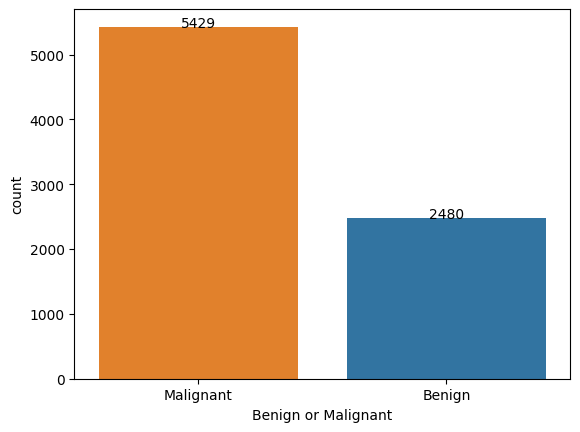

In [130]:
fig_1=sns.countplot(x='Benign or Malignant', data =df, hue='Benign or Malignant', order= df['Benign or Malignant'].value_counts().index)
for p in fig_1.patches:
    height = p.get_height().astype(int)
    fig_1.text(p.get_x()+p.get_width()/2., height + 0.1,
     height,ha="center")
plt.show()

In [111]:
df['Cancer Type'].value_counts()

Cancer Type
Ductal Carcinoma       3451
Fibroadenoma           1014
Mucinous Carcinoma      792
Lobular Carcinoma       626
Tubular Adenoma         569
Papillary Carcinoma     560
Phyllodes Tumor         453
Adenosis                444
Name: count, dtype: int64

In [113]:
df['Cancer Type'].count()

np.int64(7909)

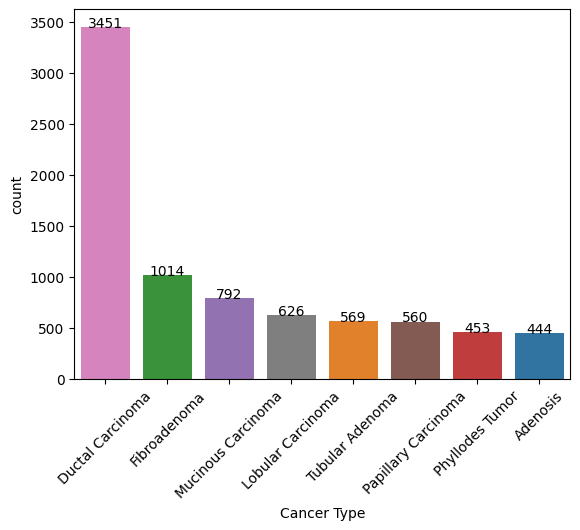

In [ ]:
fig = sns.countplot(x='Cancer Type', data =df, hue='Cancer Type', order= df['Cancer Type'].value_counts().index)
plt.xticks(rotation = 45)
for p in fig.patches:
    height = p.get_height().astype(int)
    fig.text(p.get_x()+p.get_width()/2., height + 0.1,
     height,ha="center")
plt.show()

Dataset is very unbalanced. Some techniques should be applied (oversampling, undersampling, Data Augmentation...)

In [83]:
print(f'{ben * 0.7}, 70%')
print(f'{ben * 0.3}, 30%')
print(f'{ben * 0.3 / 2} + {ben * 0.3 / 2}, 15% + 15%')

1736.0, 70%
744.0, 30%
372.0 + 372.0, 15% + 15%


In [84]:
print(f'{mal * 0.7}, 70%')
print(f'{mal * 0.3}, 30%')
print(f'{mal * 0.3 / 2} + {mal * 0.3 / 2}, 15% + 15%')

3800.2999999999997, 70%
1628.7, 30%
814.35 + 814.35, 15% + 15%


Train/Validation/Test Split

In [132]:
df['image_name'] = df['path_to_image'].apply(lambda x: os.path.basename(x))

In [135]:
X = df['image_name']
y = df['Cancer Type']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print(f"Train: {len(X_train)} | Val: {len(X_val)} | Test: {len(X_test)}")


Train: 5536 | Val: 1186 | Test: 1187


In [136]:
def copy_images(image_list, df, src_folder, dest_folder):
    for img_name in image_list:
        label = df.loc[df['image_name'] == img_name, 'Benign or Malignant'].values[0]
        src = os.path.join(src_folder, img_name)
        dst = os.path.join(dest_folder, label, img_name)
        if os.path.exists(src):
            shutil.copy(src, dst)
        else:
            print(f"⚠️ File not found: {src}")

In [139]:
unnested_folder = r'C:\Users\pedro\Desktop\Breast-Cancer-Detection\unnested'  
output_base = r'C:\Users\pedro\Desktop\Breast-Cancer-Detection\binary_class'      

#copy_images(X_train, df, unnested_folder, os.path.join(output_base, "train"))
copy_images(X_val, df, unnested_folder, os.path.join(output_base, "validation"))
copy_images(X_test, df, unnested_folder, os.path.join(output_base, "test"))

Check if Split was done as Expected

In [143]:
base_dir = r"C:\Users\pedro\Desktop\Breast-Cancer-Detection\binary_class"

for i in ['train','validation', 'test']:
    for j in ['benign', 'malignant']:
        folder = os.path.join(base_dir, i, j)
        print (f'# of {j} in {i}: {len(os.listdir(folder))}')

# of benign in train: 1736
# of malignant in train: 3800
# of benign in validation: 372
# of malignant in validation: 814
# of benign in test: 372
# of malignant in test: 815


In [148]:
df['Cancer Type'].value_counts().index.to_list

<bound method IndexOpsMixin.tolist of Index(['Ductal Carcinoma', 'Fibroadenoma', 'Mucinous Carcinoma',
       'Lobular Carcinoma', 'Tubular Adenoma', 'Papillary Carcinoma',
       'Phyllodes Tumor', 'Adenosis'],
      dtype='object', name='Cancer Type')>

In [159]:
dict_ben = {
    'Fibroadenoma':'F',
    'Tubular Adenoma':'TA',
    'Phyllodes Tumor':'PT',
    'Adenosis':'A'

}

dict_mal = {
    'Ductal Carcinoma': 'DC',
    'Mucinous Carcinoma':'MC',
    'Lobular Carcinoma':'LC',
    'Papillary Carcinoma':'PC',

}

In [160]:
base_dir = r"C:\Users\pedro\Desktop\Breast-Cancer-Detection\binary_class"

splits = ['train','validation','test']

for split in splits:
    # Benign
    folder_b = os.path.join(base_dir, split, 'benign')
    files_b = os.listdir(folder_b)
    for code in dict_ben.values():
        count = sum(f"SOB_B_{code}" in f for f in files_b)
        print(f"{split} / benign / {code}: {count}")

    # Malignant
    folder_m = os.path.join(base_dir, split, 'malignant')
    files_m = os.listdir(folder_m)
    for code in dict_mal.values():
        count = sum(f"SOB_M_{code}" in f for f in files_m)
        print(f"{split} / malignant / {code}: {count}")

train / benign / F: 710
train / benign / TA: 398
train / benign / PT: 317
train / benign / A: 311
train / malignant / DC: 2416
train / malignant / MC: 554
train / malignant / LC: 438
train / malignant / PC: 392
validation / benign / F: 152
validation / benign / TA: 85
validation / benign / PT: 68
validation / benign / A: 67
validation / malignant / DC: 517
validation / malignant / MC: 119
validation / malignant / LC: 94
validation / malignant / PC: 84
test / benign / F: 152
test / benign / TA: 86
test / benign / PT: 68
test / benign / A: 66
test / malignant / DC: 518
test / malignant / MC: 119
test / malignant / LC: 94
test / malignant / PC: 84


In [161]:
df.to_csv(r'C:\Users\pedro\Desktop\Breast-Cancer-Detection\Data\breast\image_data_preprocessed.csv')